# Financial Variance Analysis ETL Pipeline

## Summary

This project demonstrates an end-to-end **ETL (Extract, Transform, Load) pipeline** for financial variance analysis, a critical business intelligence function used by finance teams to monitor budget performance and identify spending anomalies.

**Technologies:** Python, Pandas, NumPy, Matplotlib, Seaborn  
**Domain:** Corporate Finance | Budget Management | Financial Reporting  
**Use Case:** Departmental budget variance monitoring and executive reporting

---

## Business Problem Statement

### The Challenge:
Organizations struggle to track and explain deviations between **actual spending** and **budgeted amounts** across multiple departments and time periods. Manual variance analysis is:
- ⏰ **Time-consuming**: Finance teams spend hours consolidating data from SQL databases
- ❌ **Error-prone**: Manual calculations lead to reporting inconsistencies  
- 📊 **Lacks visibility**: Executives need clear visualizations to understand spending trends
- 🚨 **Reactive**: No automated alerts for departments exceeding budget thresholds

### The Solution:
This ETL pipeline automates variance calculation, flags high-risk departments, and generates executive-ready visualizations to support data-driven budget decisions.

---

## Project Objectives

1. **Extract**: Simulate SQL-aggregated financial data (Actual vs Budgeted spending)
2. **Transform**: Calculate variance metrics (absolute dollar difference and percentage)
3. **Load**: Generate analysis-ready datasets with derived KPIs
4. **Visualize**: Create trend charts and department comparisons for stakeholder reporting
5. **Flag**: Identify departments requiring budget review based on variance thresholds

---

## Data Dictionary

### Input Data Fields (Source: SQL Database)

| Column Name | Data Type | Description | Business Logic |
|-------------|-----------|-------------|----------------|
| **Month_Key** | Integer | Fiscal period identifier (YYYYMM format) | Example: 202301 = January 2023 |
| **Department** | String | Business unit name | Sales, Marketing, R&D |
| **Account_ID** | Integer | General ledger account code | Links to chart of accounts (6000-7000 range) |
| **Actual_Spend** | Float | Total dollars spent in period | Sum of all transactions posted |
| **Budgeted_Spend** | Float | Approved budget allocation | Set during annual planning cycle |

### Derived KPI Fields (Calculated in ETL)

| Column Name | Calculation Formula | Interpretation |
|-------------|---------------------|----------------|
| **Variance_Amount** | Actual_Spend - Budgeted_Spend | Negative = Favorable (under budget), Positive = Unfavorable (over budget) |
| **Variance_Percent** | (Actual_Spend - Budgeted_Spend) / Budgeted_Spend | Percentage deviation from plan |
| **High_Variance_Flag** | Review Required if abs(Variance_Percent) > 0.10 | Flags departments needing CFO attention |

---

In [ ]:
import pandas as pd
import numpy as np

# --- Dummy Data Simulation (Pretends to be the SQL output from Step 1) ---
data = {
    'Month_Key': [202301, 202301, 202301, 202302, 202302, 202302,202303, 202303, 202303, 202304, 202304, 202304],
    'Department': ['Sales', 'Marketing', 'R&D', 'Sales', 'Marketing', 'R&D', 'Sales', 'Marketing', 'R&D', 'Sales', 'Marketing', 'R&D'],
    'Account_ID': [6000, 6100, 7000, 6000, 6100, 7000, 6000, 6100, 7000, 6000, 6100, 7000],
    'Actual_Spend': [105000, 95000, 52000, 135000, 65000, 50000, 95000, 88000, 100000, 70000, 67000, 130000],
    'Budgeted_Spend': [133000, 80000, 50100, 110000, 60000, 55000, 95000, 99000, 135000, 85000, 52000, 170000]
}
df = pd.DataFrame(data)

print("--- 1. Raw Data Input (After SQL Aggregation) ---")
print(df)

# --- ETL: Transformation Stage (The core Financial Analysis) ---

# 1. Calculate the absolute dollar difference
df['Variance_Amount'] = df['Actual_Spend'] - df['Budgeted_Spend']

# 2. Calculate the percentage difference
# Handle division by zero for accounts with a zero budget (set variance to 100% or NaN)
df['Variance_Percent'] = np.where(
    df['Budgeted_Spend'] != 0,
    df['Variance_Amount'] / df['Budgeted_Spend'],
    np.nan
)

# 3. Create a Flag for High-Priority Variances (Business Rule)
# Finance teams often prioritize analysis on variances > 10%
VARIANCE_THRESHOLD = 0.10 # 10% variance tolerance
df['High_Variance_Flag'] = np.where(
    (df['Variance_Percent'].abs() > VARIANCE_THRESHOLD) & (df['Actual_Spend'] > 10000),
    'Review Required',
    'Within Tolerance'
)

print("\n--- 2. Transformed Data (Ready for Reporting) ---")
print(df)
print("\nKey Insight (Variance Report):")
print(df[df['High_Variance_Flag'] == 'Review Required'])

--- 1. Raw Data Input (After SQL Aggregation) ---
    Month_Key Department  Account_ID  Actual_Spend  Budgeted_Spend
0      202301      Sales        6000        105000          133000
1      202301  Marketing        6100         95000           80000
2      202301        R&D        7000         52000           50100
3      202302      Sales        6000        135000          110000
4      202302  Marketing        6100         65000           60000
5      202302        R&D        7000         50000           55000
6      202303      Sales        6000         95000           95000
7      202303  Marketing        6100         88000           99000
8      202303        R&D        7000        100000          135000
9      202304      Sales        6000         70000           85000
10     202304  Marketing        6100         67000           52000
11     202304        R&D        7000        130000          170000

--- 2. Transformed Data (Ready for Reporting) ---
    Month_Key Department  Ac

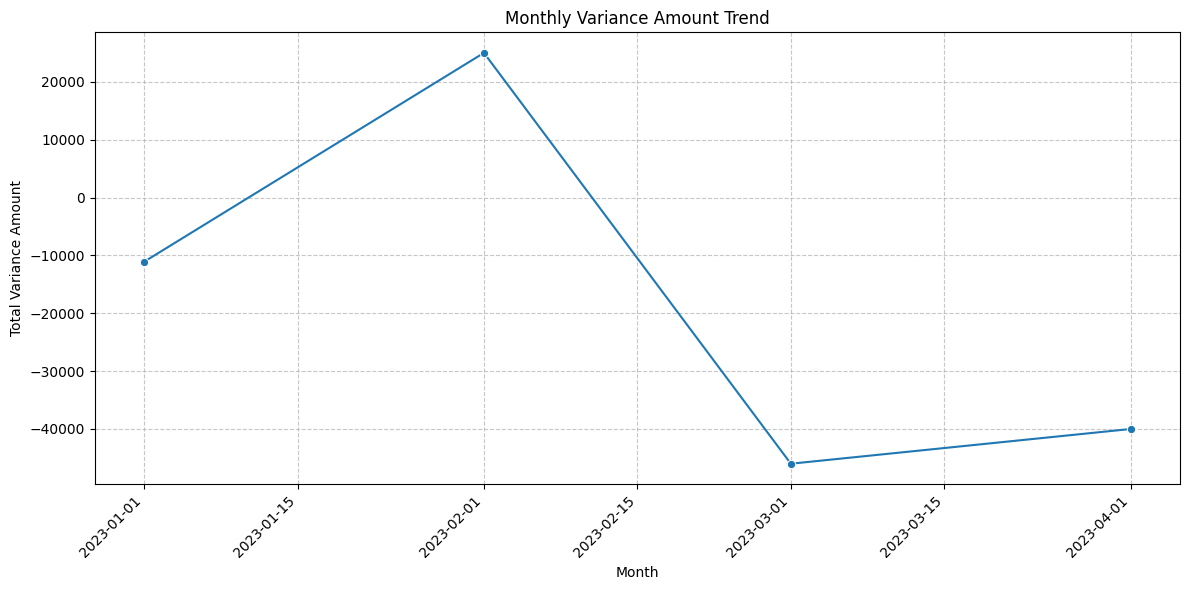

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group by Month_Key and sum the Variance_Amount
monthly_variance = df.groupby('Month_Key')['Variance_Amount'].sum().reset_index()

# Convert Month_Key to datetime objects for proper formatting on the x-axis
# First convert to string, then to datetime
monthly_variance['Month_Key_Formatted'] = pd.to_datetime(monthly_variance['Month_Key'].astype(str), format='%Y%m')

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month_Key_Formatted', y='Variance_Amount', data=monthly_variance, marker='o')
plt.title('Monthly Variance Amount Trend')
plt.xlabel('Month')
plt.ylabel('Total Variance Amount')
plt.grid(True, linestyle='--', alpha=0.7)
# Format x-axis labels to show 'YYYY-MM'
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tick_params(axis='x', labelbottom=True) # Ensure labels are visible after rotation
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
display(df.describe())

,Month_Key,Account_ID,Actual_Spend,Budgeted_Spend,Variance_Amount,Variance_Percent
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,202302.500000,6366.666667,87666.666667,93675.000000,-6008.333333,-0.021590
std,1.167748,469.687194,27857.864349,38023.847182,20561.237066,0.188646
min,202301.000000,6000.000000,50000.000000,50100.000000,-40000.000000,-0.259259
25%,202301.750000,6000.000000,66500.000000,58750.000000,-18250.000000,-0.184985
50%,202302.500000,6100.000000,91500.000000,90000.000000,-2500.000000,-0.045455
75%,202303.250000,7000.000000,101250.000000,115750.000000,7500.000000,0.109375
max,202304.000000,7000.000000,135000.000000,170000.000000,25000.000000,0.288462


/tmp/ipython-input-2692596488.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Variance_Amount', data=department_variance, palette='viridis')


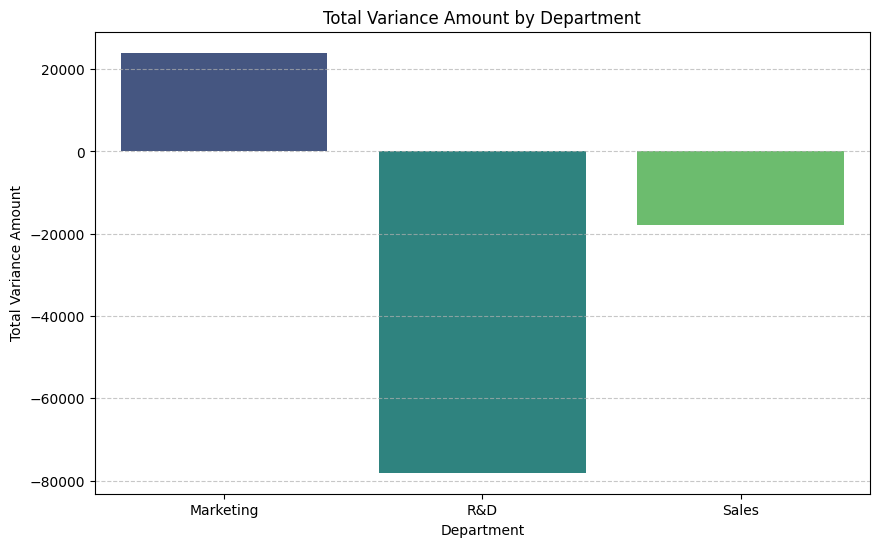

In [ ]:
# Group by Department and sum the Variance_Amount
department_variance = df.groupby('Department')['Variance_Amount'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='Variance_Amount', data=department_variance, palette='viridis')
plt.title('Total Variance Amount by Department')
plt.xlabel('Department')
plt.ylabel('Total Variance Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()